In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data= pd.read_csv(r"C:\Users\rpaul\Downloads\archive\Mall_Customers.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data['Gender']= data['Gender'].map({'Male':0, 'Female':1})

In [6]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [7]:
x= data.drop('Gender',axis=1)
y= data['Gender']

In [8]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

In [11]:
x_pca

array([[-1.09384203e+02,  5.47772303e+00],
       [-1.08203115e+02, -3.49325311e+01],
       [-1.07376109e+02,  3.78413764e+01],
       [-1.06007616e+02, -3.05622516e+01],
       [-1.04980136e+02,  7.29722069e+00],
       [-1.03774532e+02, -2.98007906e+01],
       [-1.02996298e+02,  4.13232718e+01],
       [-1.01426552e+02, -4.70708699e+01],
       [-1.00952459e+02,  5.09230257e+01],
       [-9.93803318e+01, -2.40341569e+01],
       [-9.90709231e+01,  4.09171508e+01],
       [-9.74038927e+01, -4.91519408e+01],
       [-9.67775993e+01,  3.78943584e+01],
       [-9.52521231e+01, -3.02503511e+01],
       [-9.48419680e+01,  3.50267217e+01],
       [-9.34012477e+01, -3.26459773e+01],
       [-9.24497381e+01,  1.31746134e+01],
       [-9.12422731e+01, -2.04357200e+01],
       [-8.99474604e+01,  2.29449767e+01],
       [-8.84750191e+01, -4.81068118e+01],
       [-8.75739033e+01,  1.32182995e+01],
       [-8.63491067e+01, -2.60558617e+01],
       [-8.56044545e+01,  4.49596123e+01],
       [-8.

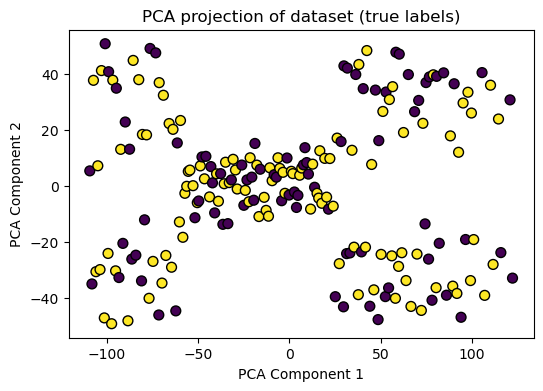

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.title("PCA projection of dataset (true labels)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [68]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

C:\Users\rpaul\.anaconda_n\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rpaul\.anaconda_n\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rpaul\.anaconda_n\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rpaul\.anaconda_n\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

C:\Users\rpaul\.anaconda_n\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rpaul\.anaconda_n\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rpaul\.anaconda_n\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rpaul\.anaconda_n\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

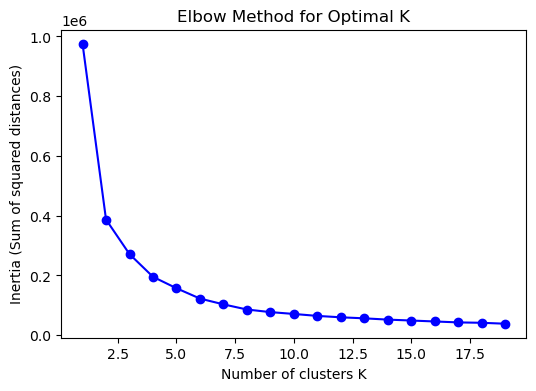

In [69]:
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [80]:
optimal_k = 4

In [85]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(x)

C:\Users\rpaul\.anaconda_n\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rpaul\.anaconda_n\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\rpaul\.anaconda_n\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\rpaul\.anaconda_n\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


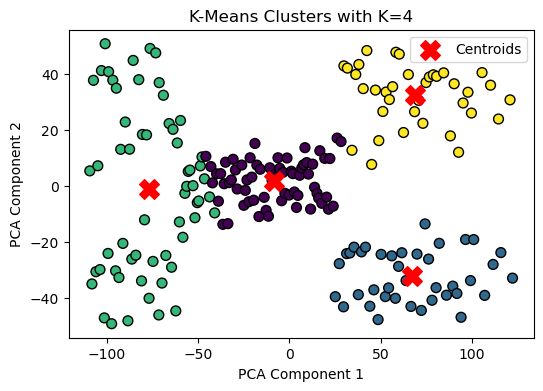

In [82]:
plt.figure(figsize=(6,4))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cluster_labels, cmap='viridis', s=50, edgecolor='k')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0], 
            pca.transform(kmeans.cluster_centers_)[:,1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title(f"K-Means Clusters with K={optimal_k}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [83]:
score = silhouette_score(x, cluster_labels)
print(f"Silhouette Score for K={optimal_k}: {score:.3f}")

Silhouette Score for K=4: 0.423


In [84]:
from mpl_toolkits.mplot3d import Axes3D